In [98]:
#coding = utf-8
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib
import numpy as np
import pandas as pd

f1 = r'D:\Users\SHENWANXIANG533\Desktop\dataset\top_500.txt' ##不支持中文路径
f2 = r'D:\Users\SHENWANXIANG533\Desktop\dataset\med_500.txt' ##不支持中文路径
f3 = r'D:\Users\SHENWANXIANG533\Desktop\dataset\last_500.txt' ##不支持中文路径

df1 = pd.read_csv(f1, sep = '\t')
df2 = pd.read_csv(f2, sep = '\t')
df3 = pd.read_csv(f3, sep = '\t')
df1.columns = df1.columns.str.replace('swx_chanzghou_person_detail_info_final_notab.','')
df2.columns = df2.columns.str.replace('swx_chanzghou_person_detail_info_final_notab.','')
df3.columns = df3.columns.str.replace('swx_chanzghou_person_detail_info_final_notab.','')

df1['visit_flags'] = df1['visit_flags'].map({1:'top500'})
df2['visit_flags'] = df2['visit_flags'].map({1:'med500'})
df3['visit_flags'] = df3['visit_flags'].map({1:'last500'})
df = pd.concat([df1,df2,df3],axis = 0)

In [99]:
dfc = df[df.columns[68:88]]
dft = df[df.columns[91:-4]]
df1 = pd.DataFrame(df['visit_flags'])

In [100]:
df_times = pd.concat([df1,dfc,dft],axis = 1)

In [101]:
df_times

,visit_flags,total_org_types1_times,total_org_types2_times,total_org_types3_times,total_org_types4_times,2013_org_types1_times,2013_org_types2_times,2013_org_types3_times,2013_org_types4_times,2014_org_types1_times,...,15_clock_times,16_clock_times,17_clock_times,18_clock_times,19_clock_times,20_clock_times,21_clock_times,22_clock_times,23_clock_times,24_clock_times
0,top500,0,0,11,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,top500,0,0,15,0,0,0,5,0,0,...,1,0,0,0,0,0,0,0,0,0
2,top500,4,0,32,6,3,0,16,6,0,...,1,0,0,2,0,0,0,0,0,5
3,top500,0,0,49,0,0,0,12,0,0,...,2,0,0,0,0,0,0,0,0,26
4,top500,0,0,13,0,0,0,4,0,0,...,9,0,0,0,0,0,0,0,0,0
5,top500,0,0,52,115,0,0,32,81,0,...,26,13,6,12,7,14,2,1,1,1
6,top500,12,3,5,17,6,0,0,8,6,...,1,0,0,0,0,0,0,0,0,0
7,top500,0,0,29,0,0,0,12,0,0,...,0,0,0,0,0,0,0,0,0,15
8,top500,0,0,21,2,0,0,11,2,0,...,4,2,0,0,0,0,1,0,1,0
9,top500,0,0,15,12,0,0,7,12,0,...,5,1,0,0,1,0,0,0,0,0


In [57]:
from pandas.tools.plotting import radviz
plt.figure(figsize = (18,16))
radviz(df_times, 'visit_flags')


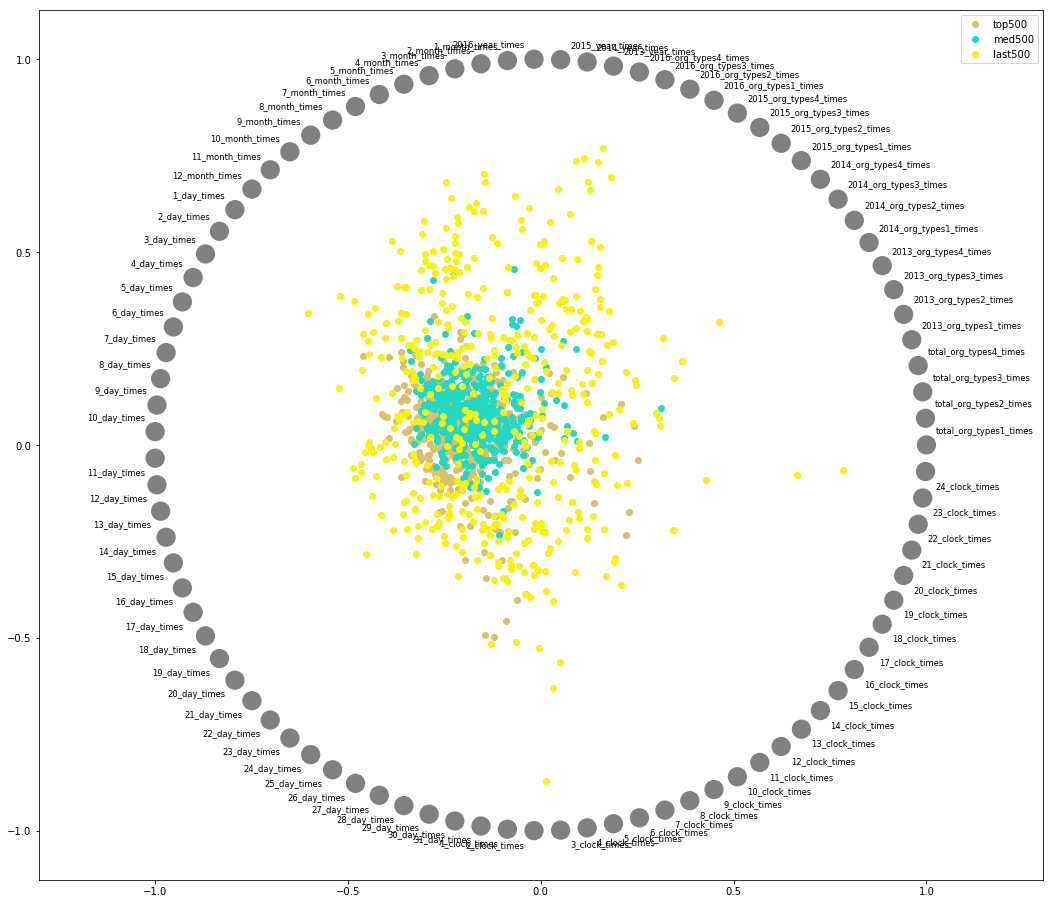

In [58]:
plt.show()

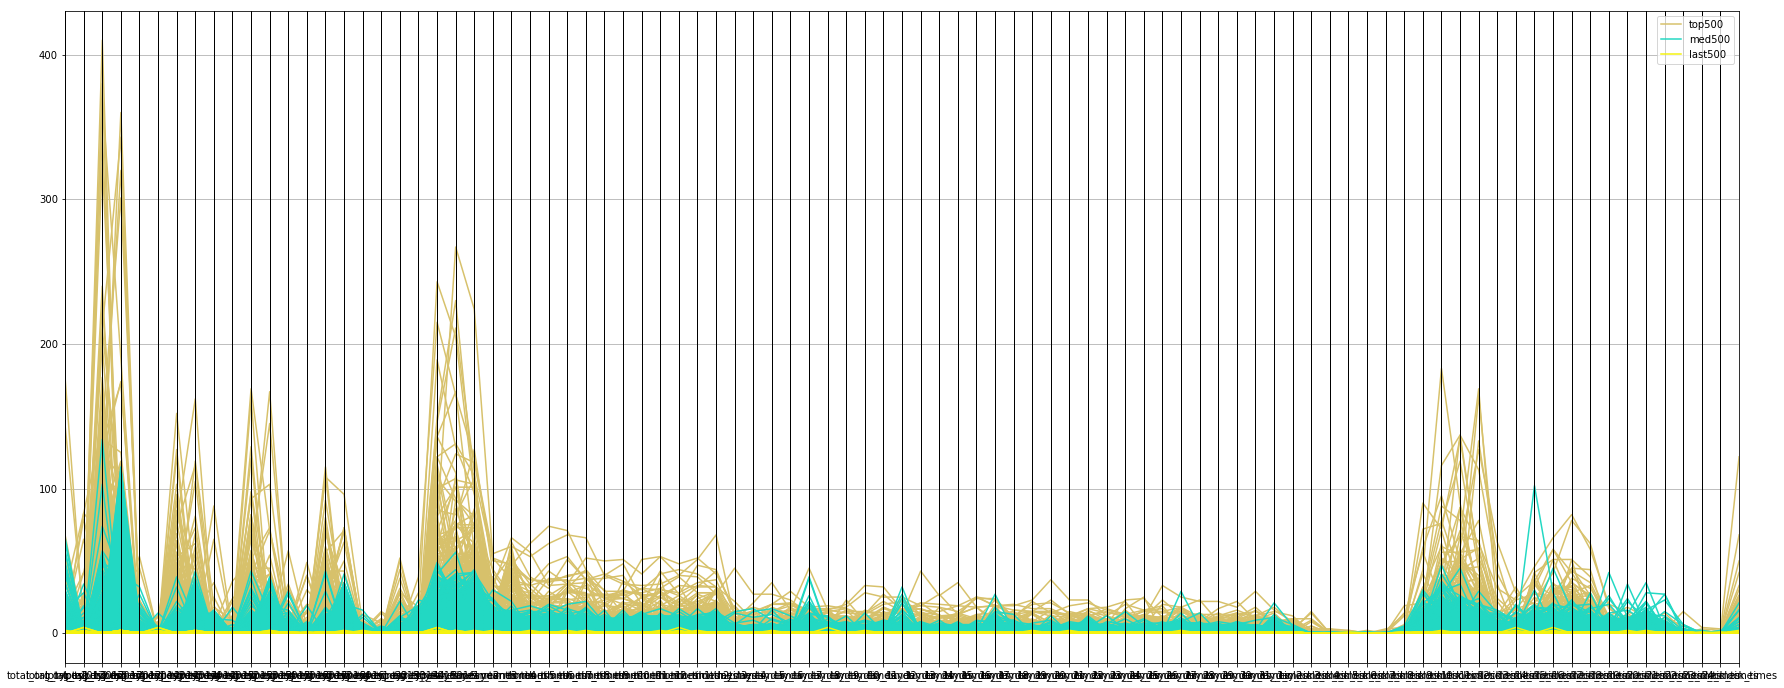

In [60]:
from pandas.tools.plotting import parallel_coordinates
plt.figure(figsize = (30,12))
parallel_coordinates(df_times, 'visit_flags')
plt.show()

In [61]:
def scal_df(df,label):
    labels = df[label]
    dataset = df[df.columns[1:]]
    max_f = dataset.values.max(axis = 0)
    min_f = dataset.values.min(axis = 0)
    range_f = max_f - min_f
    scaled_dataset = (dataset-min_f)/range_f
    scaled_df = pd.concat([labels,scaled_dataset],axis = 1)
    return scaled_df


In [63]:
scaled_df = scal_df(df_times, 'visit_flags')

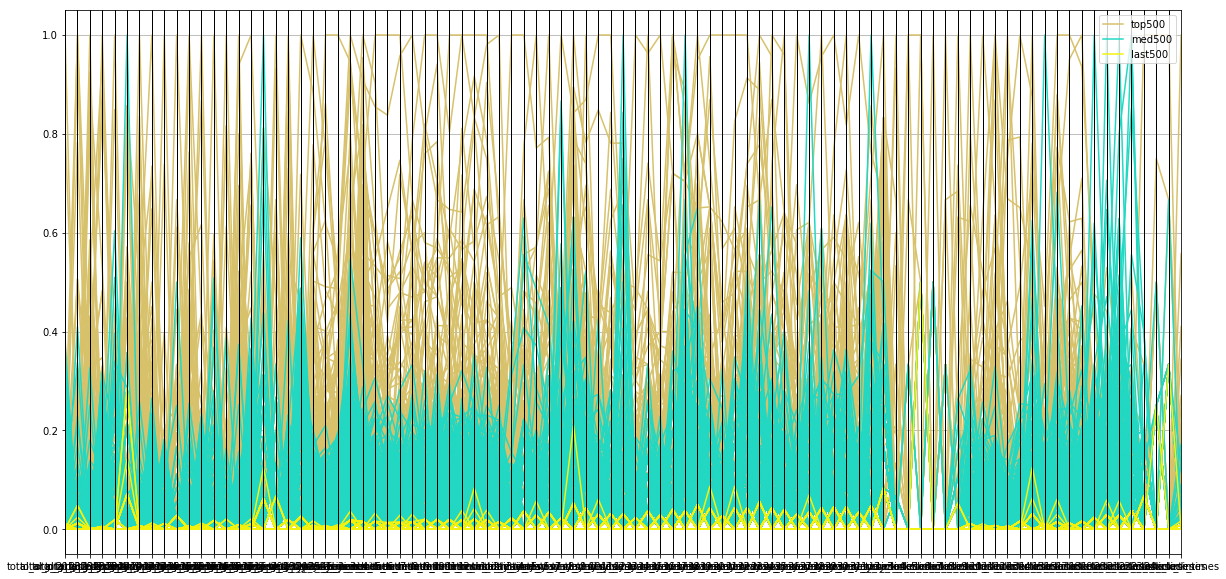

In [65]:
plt.figure(figsize = (20,10))
parallel_coordinates(scaled_df, 'visit_flags')
plt.show()

In [66]:
from pandas.tools.plotting import andrews_curves
plt.figure(figsize = (20,10))
andrews_curves(df_times, 'visit_flags')

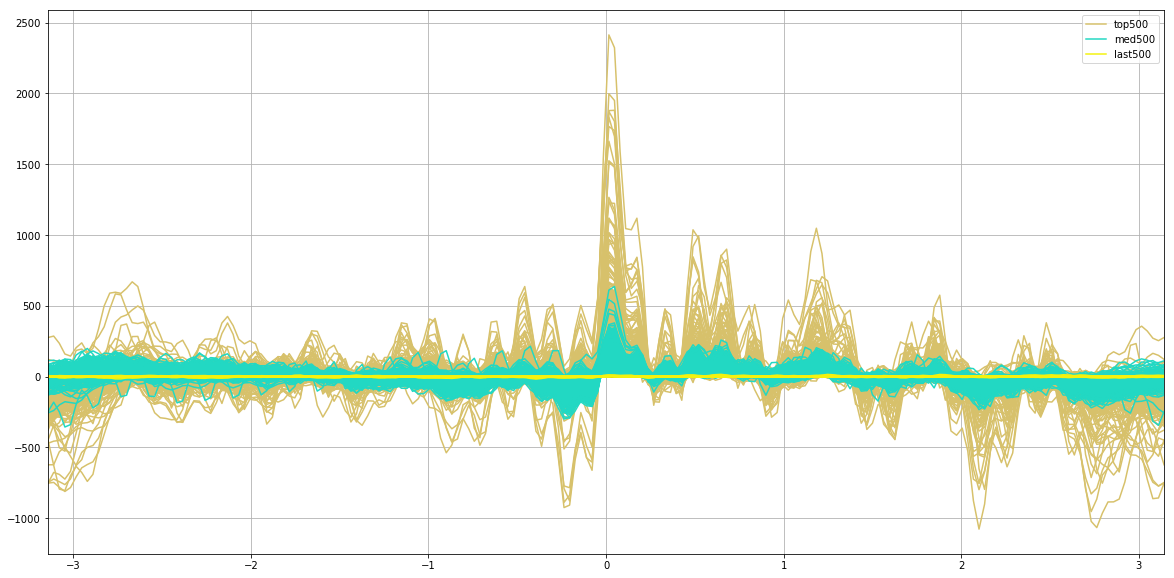

In [67]:
plt.show()

In [70]:
df = scaled_df
import scipy
import pylab
import scipy.cluster.hierarchy as sch
from sklearn.metrics.pairwise import pairwise_distances
# remove label,this should be unsuperwised learning
data = df[df.columns[1:]].values
matrix_data = np.log(data)
# calculating the distence between gene and gene, people and people
D_gene = pairwise_distances(data, data, metric='euclidean', n_jobs=-1).round(2)
D_people = pairwise_distances(data.T, data.T, metric='correlation', n_jobs=-1).round(2)
# convert pairwise_distances matrix to n*(n-1)/2 list
D_gene = scipy.spatial.distance.squareform(D_gene)
D_people = scipy.spatial.distance.squareform(D_people)
# Compute and plot the gene dendrogram.
fig = pylab.figure(figsize=(30,30))
ax1 = fig.add_axes([0.07,0.1,0.2,0.6]) #(left, bottom, width, height)
Y_fp = sch.linkage(D_gene, method='average')
Z1 = sch.dendrogram(Y_fp, orientation='right',distance_sort = 'descending')
ax1.set_xticks([])
ax1.set_yticks([])
# Compute and plot the people dendrogram.
ax2 = fig.add_axes([0.3,0.75,0.6,0.2])
Y_des = sch.linkage(D_people, method='complete')
Z2 = sch.dendrogram(Y_des,distance_sort = 'descending')
ax2.set_xticks([])
ax2.set_yticks([])
# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = matrix_data[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower')
# add x and y label for the matrix
gene = df.columns
people = list(df[df.columns[0]])
people_label = [people[x] for x in idx1]
gene_label = [gene[x] for x in idx2]
plt.xticks(range(len(gene)), gene_label)
plt.yticks(range(len(people)), people_label, rotation='vertical')
# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
pylab.colorbar(im, cax=axcolor)
# Display and save figure.
fig.show()


D:\Users\SHENWANXIANG533\ProgramFiles\Anaconda3_4.3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in log
D:\Users\SHENWANXIANG533\ProgramFiles\Anaconda3_4.3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


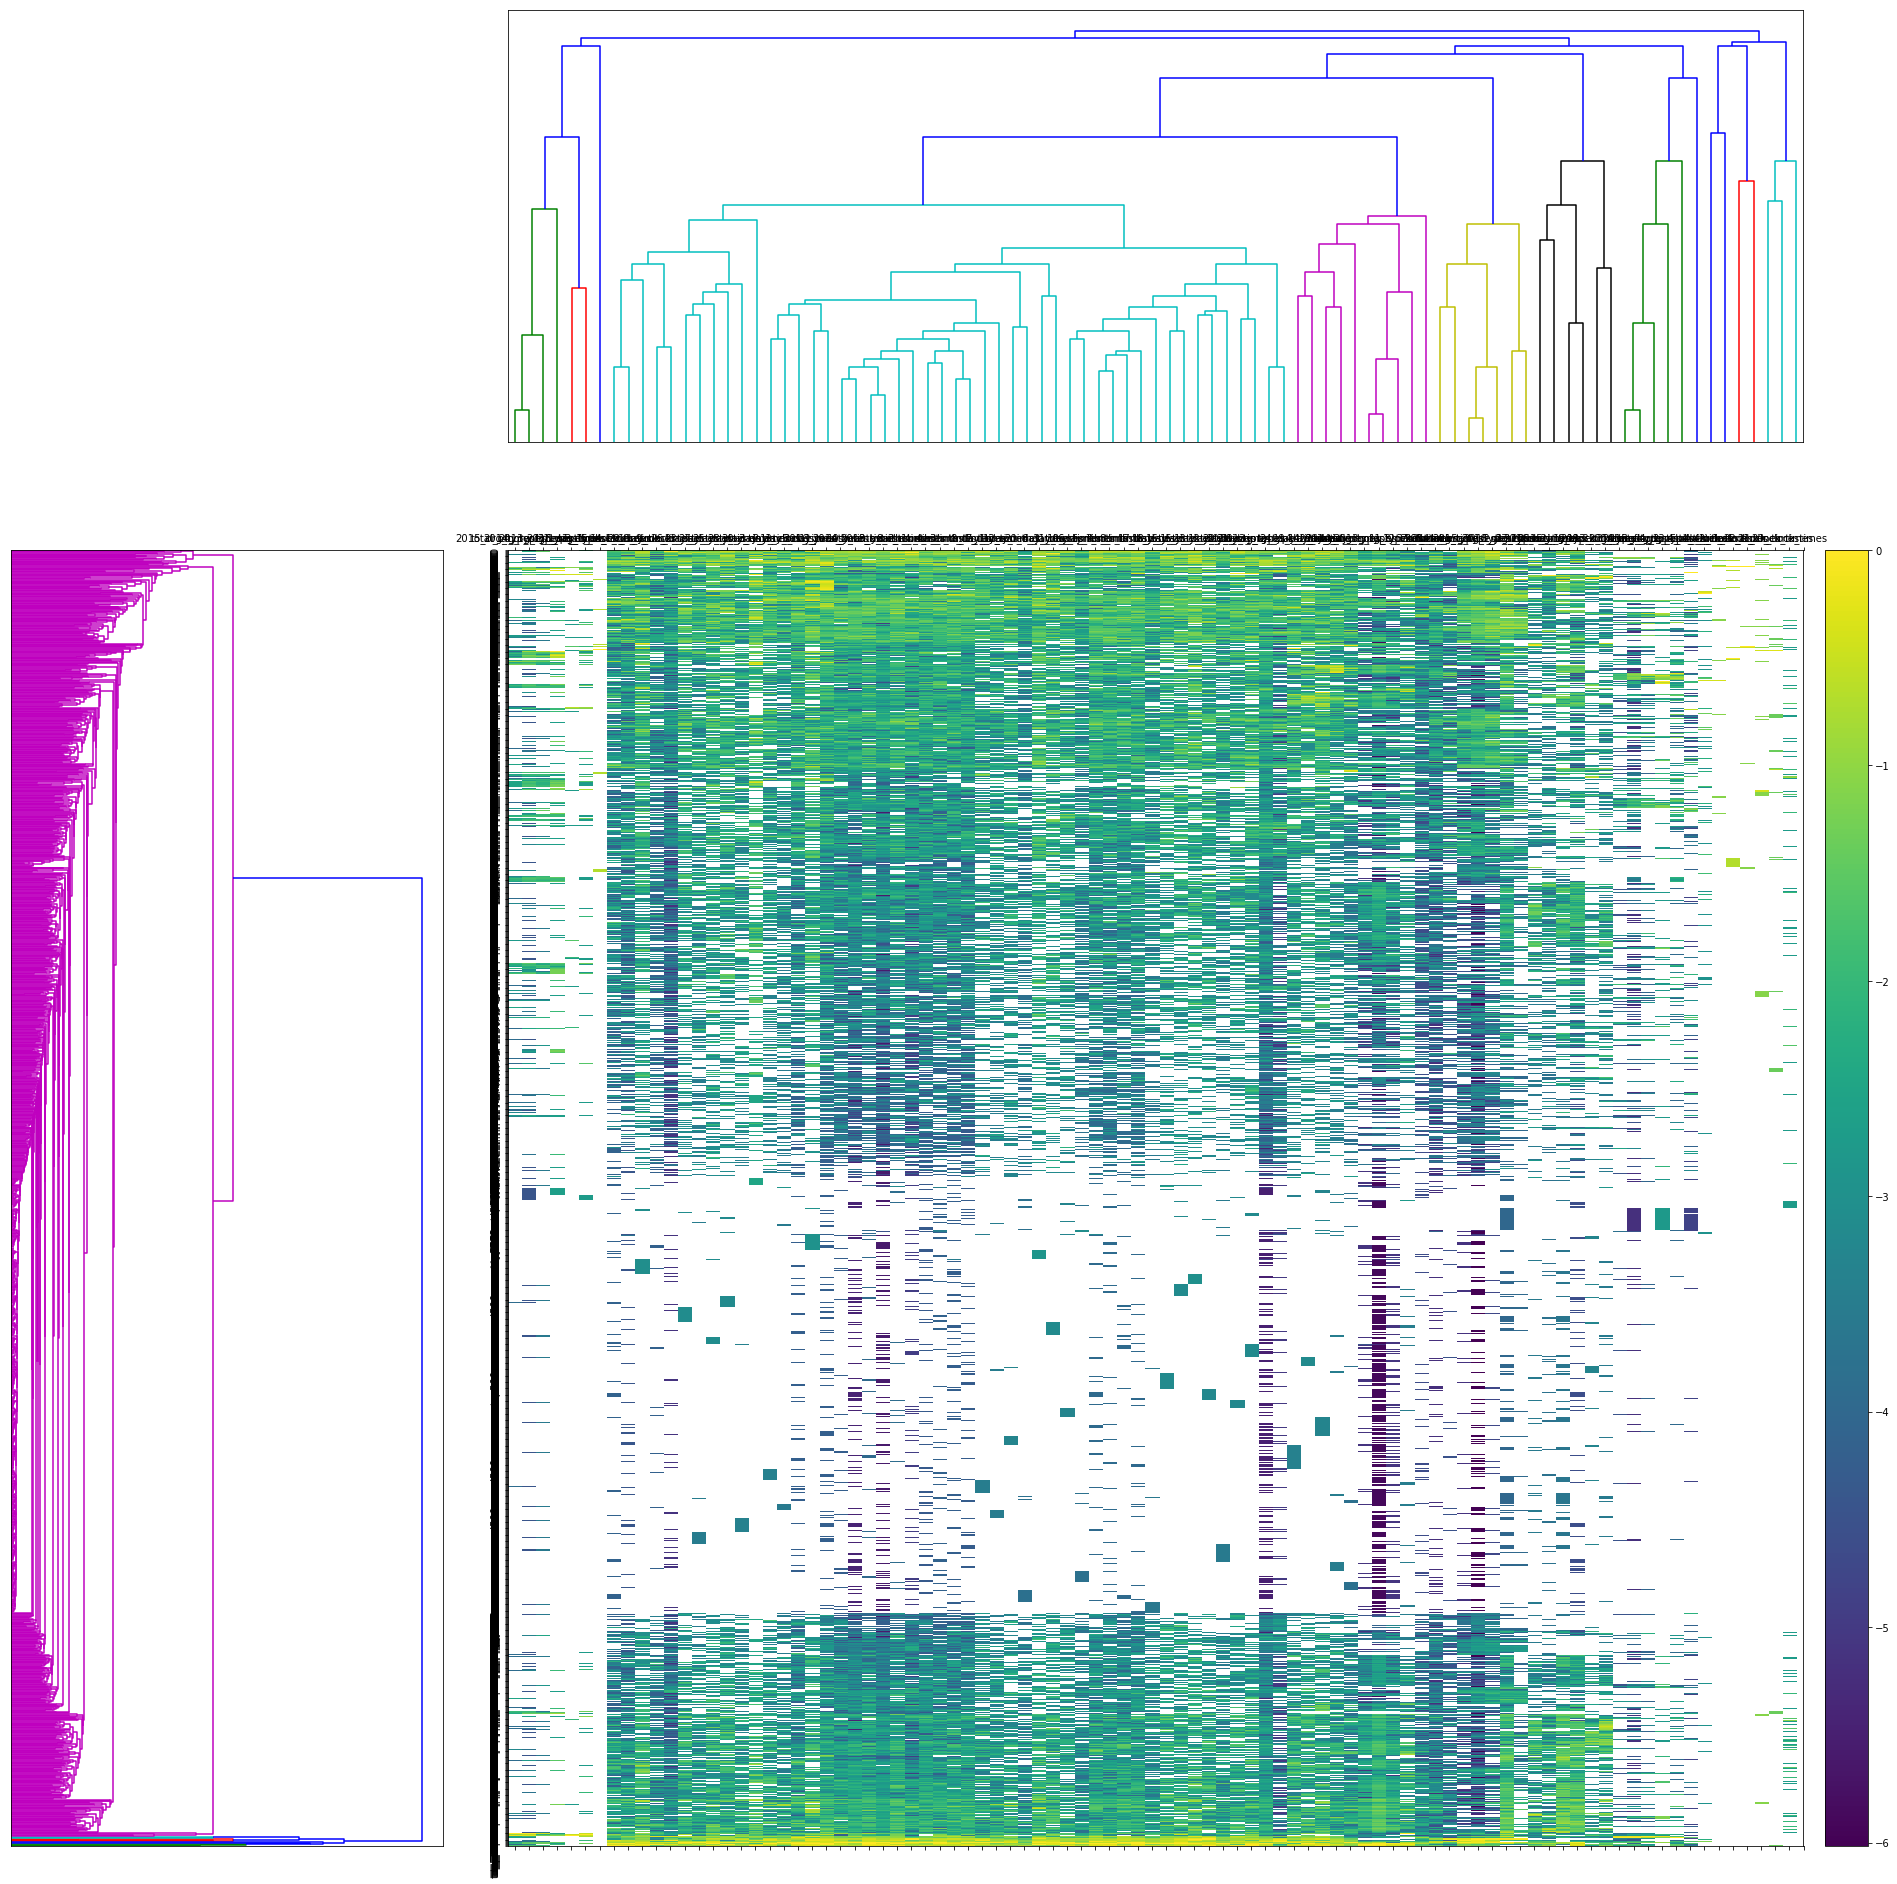

In [71]:
plt.show()

In [126]:
#PCA, kernel PCA(3D)
#coding=utf-8 
from sklearn.decomposition import PCA, KernelPCA # sklearn has pca and kpca,but is not used in this script
from matplotlib.markers import MarkerStyle
from scipy.spatial.distance import pdist, squareform
from mpl_toolkits.mplot3d import Axes3D
def linear_pca(X,k):
    X -= X.mean(0)
    N = X.shape[0]
    C = X.T.dot(X)/N
    Lambda, Q = np.linalg.eig(C)
    Lambda = Lambda.astype(float)
    Q = Q.astype(float)
    eigen_pairs = [(Lambda[i], Q[:, i]) for i in range(len(Lambda))]  # this is a list contains tuples
    eigen_pairs = sorted(eigen_pairs, reverse=True, key=lambda x: x[0])
    Weight = np.column_stack((eigen_pairs[i][1] for i in range(k))) # Component loadings
    Explained = np.column_stack((eigen_pairs[i][0] for i in range(k))) #
    Explained_percetage = Explained/Explained.sum()
    X_pca = X.dot(Weight)
    return Weight, Explained_percetage, X_pca
def rbf_kpca(X, gamma, k):
    sq_dist = pdist(X, metric='sqeuclidean') # sq_dist.shape = N*(N-1)/2
    mat_sq_dist = squareform(sq_dist)
    K = np.exp(-gamma*mat_sq_dist)
    N = X.shape[0]
    one_N = np.ones((N, N))/N  # sum is N
    K = K - one_N.dot(K) - K.dot(one_N) + one_N.dot(K).dot(one_N)
    Lambda, Q = np.linalg.eig(K)
    Lambda = Lambda.astype(float)
    Q = Q.astype(float)
    eigen_pairs = [(Lambda[i], Q[:, i]) for i in range(len(Lambda))]
    eigen_pairs = sorted(eigen_pairs, reverse=True, key=lambda x: x[0])
    Weight = np.column_stack((eigen_pairs[i][1] for i in range(k)))
    Explained = np.column_stack((eigen_pairs[i][0] for i in range(k)))
    Explained_percetage = Explained/Explained.sum()
    return Weight, Explained_percetage
# set parameters
k = 3
para_gamma = 5
data = df[df.columns[1:]].values
# using linear_pca function
pca, pca_explained, X_pca = linear_pca(data.T,k)
# using rbf_kpca function
kpca, kpca_explained = rbf_kpca(data, para_gamma, k) 
#concat data
pca_df = pd.DataFrame(pca,columns=['pc1','pc2','pc3'])
kpca_df = pd.DataFrame(kpca,columns=['kpc1','kpc2','kpc3'])


D:\Users\SHENWANXIANG533\ProgramFiles\Anaconda3_4.3\lib\site-packages\ipykernel\__main__.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
D:\Users\SHENWANXIANG533\ProgramFiles\Anaconda3_4.3\lib\site-packages\ipykernel\__main__.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
D:\Users\SHENWANXIANG533\ProgramFiles\Anaconda3_4.3\lib\site-packages\ipykernel\__main__.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
D:\Users\SHENWANXIANG533\ProgramFiles\Anaconda3_4.3\lib\site-packages\ipykernel\__main__.py:30: ComplexWarning: Casting complex values to real discards the imaginary part


In [127]:
final_df = pd.concat([pd.DataFrame(df['visit_flags'].values,columns = ['visit_flags']),pca_df,kpca_df],axis =1)
final_df['visit_flags'] = final_df['visit_flags'].map({'top500':1,'med500':2,'last500':3})

D:\Users\SHENWANXIANG533\ProgramFiles\Anaconda3_4.3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


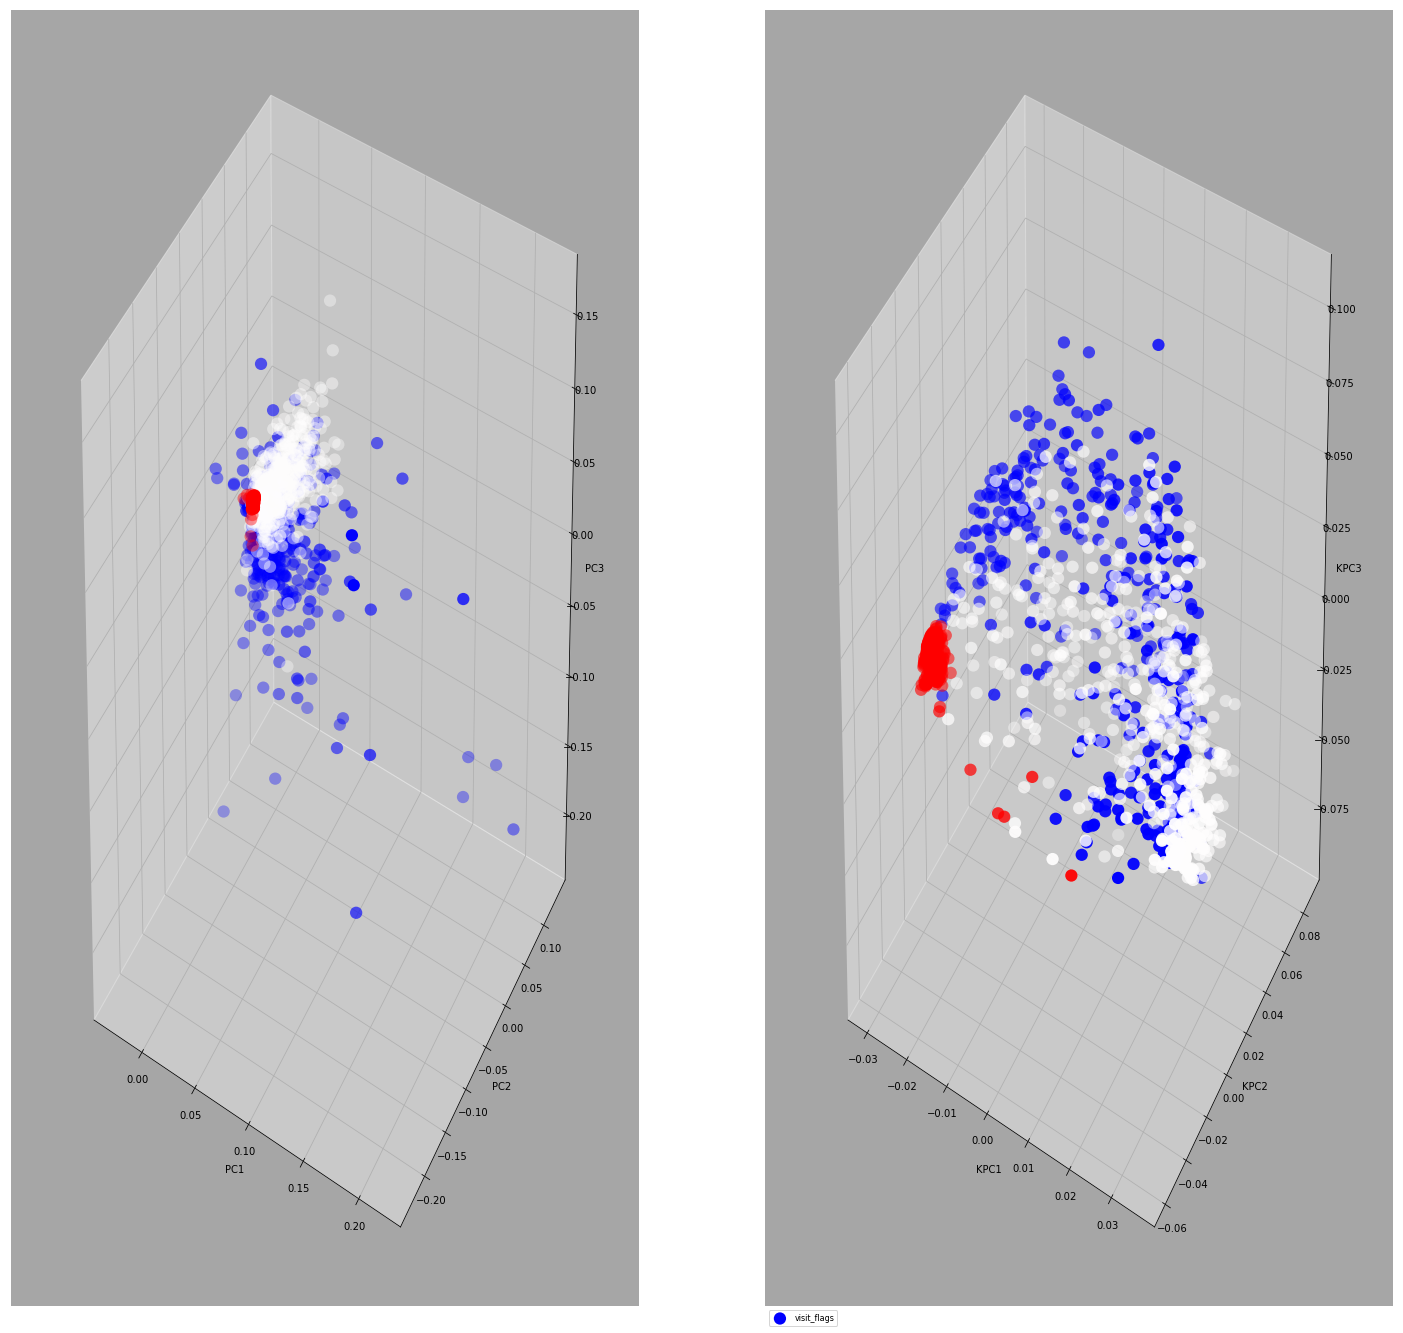

In [128]:
#画图
# plot 3D scatter
# pca data
# define your figure's size
fig = plt.figure(figsize=(20,20))
# add first subfig under your figure
ax = fig.add_subplot(121, projection='3d', axisbg='0.65')
plt.subplots_adjust(bottom=0.05, left=.03, right=.99, top=.95, hspace=.35)
p1 = ax.scatter(final_df['pc1'], final_df['pc2'], final_df['pc3'], c=final_df['visit_flags'], s=150, marker='o', edgecolor = 'none', cmap=plt.cm.bwr, label = 'visit_flags') #edgecolor,facecolors
#plt.colorbar(p1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax2 = fig.add_subplot(122, projection='3d',axisbg='0.65')
# add second subfig under your figure
plt.subplots_adjust(bottom=0.05, left=.03, right=.99, top=.95, hspace=.35)
kp1 = ax2.scatter(final_df['kpc1'], final_df['kpc2'], final_df['kpc3'], c=final_df['visit_flags'], s=150, marker='o',edgecolor = 'none', cmap=plt.cm.bwr, label = 'visit_flags') #edgecolor,facecolors
ax2.set_xlabel('KPC1')
ax2.set_ylabel('KPC2')
ax2.set_zlabel('KPC3')
#plt.colorbar(kp1)
plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))
plt.show()


In [110]:

def from_df_2_newick(df,leaf_names_list):
    from scipy.cluster import hierarchy
    import scipy
    import pylab
    import scipy.cluster.hierarchy as sch
    from sklearn.metrics.pairwise import pairwise_distances
    '''
    You need the linkage matrix Z, which is the input to the scipy dendrogram function, 
    and convert that to Newick format. Additionally, 
    you need a list 'leaf_names' with the names of your leaves.
    Here is a function that will do the job:

    tree = hierarchy.to_tree(Z,False)
    getNewick(tree, "", tree.dist, leaf_names)
    '''
    def getNewick(node, newick, parentdist, leaf_names):
        if node.is_leaf():
            return "%s:%.2f%s" % (leaf_names[node.id], parentdist - node.dist, newick)
        else:
            if len(newick) > 0:
                newick = "):%.2f%s" % (parentdist - node.dist, newick)
            else:
                newick = ");"
            newick = getNewick(node.get_left(), newick, node.dist, leaf_names)
            newick = getNewick(node.get_right(), ",%s" % (newick), node.dist, leaf_names)
            newick = "(%s" % (newick)
            return newick
    data = df[df.columns[1:]].values
    label = df[df.columns[0]].values
    D0 = pairwise_distances(data, data, metric='euclidean', n_jobs=-1)
    # convert pairwise_distances matrix to n*(n-1)/2 list
    D = scipy.spatial.distance.squareform(D0)
    #D = sch.distance.pdist(data,'euclidean') 
    Z = sch.linkage(D, method='average')
    tree = hierarchy.to_tree(Z,False)
    newick = getNewick(tree, "", tree.dist, leaf_names)
    return newick

In [113]:

leaf_names_list = list(df[df.columns[0]])
newick_f = from_df_2_newick(df_times,leaf_names_list) 



In [114]:
newick_f

'((((((10716699:65.04,10890178:65.04):136.21,10962083:201.25):30.94,10950248:232.19):119.39,10766387:351.58):127.79,(((10783590:131.67,10783580:131.67):86.16,10717903:217.83):42.71,10787849:260.53):218.84):59.40,(((((((10765727:135.79,10774173:135.79):19.38,10956389:155.17):15.03,10950959:170.20):17.48,((((10037138:106.57,11762614:106.57):19.34,10395879:125.92):12.22,(((((10773282:76.69,10765740:76.69):11.76,10890197:88.45):9.18,((11324460:61.77,10385861:61.77):22.79,10111761:84.56):13.07):24.73,10040301:122.36):2.94,(10315094:102.13,10897107:102.13):23.18):12.83):4.68,((((10909186:58.65,11062225:58.65):29.13,10788860:87.78):28.44,10803688:116.22):14.26,(10523050:91.72,10043964:91.72):38.76):12.34):44.86):16.65,(((10773454:96.85,10287730:96.85):36.21,10753894:133.06):53.24,10767388:186.29):18.04):30.54,(((((((((10806443:69.41,10765663:69.41):7.47,(((((10806146:42.52,10755461:42.52):1.51,10757123:44.03):6.90,10765728:50.93):5.44,10740972:56.37):5.01,10771270:61.38):15.50):14.80,((((((((